In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt

df = pd.read_csv('../data/jan_data.csv')
df['time'] = pd.to_datetime(df['time'])

df.iloc[1800]['dollar_open_interest_close']

C:\Users\vosko\AppData\Local\Temp\ipykernel_23712\3452797966.py:6: DtypeWarning: Columns (38) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/jan_data.csv')


1875000776.354

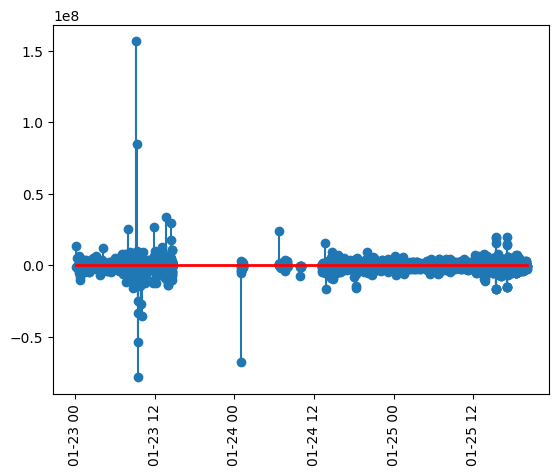

In [113]:

df['diff'] = df['dollar_open_interest_close'].diff()
df_jan2324 = df.loc[(df['time']>'2024-01-23')]
x = df_jan2324['time']
y = df_jan2324['diff']
plt.xticks(rotation=90)
markerline, stemlines, baseline  = plt.stem(x,y)
plt.setp(baseline, color='r', linewidth=2)

plt.show()


In [137]:
from scipy import stats
import math

df_slice = df_jan2324.loc[df_jan2324['search_resolution']==1]
df_slice = df_slice.sort_values(by='time')
df_slice = df_slice.drop_duplicates(subset=['time'])

window = 180
for i in range(1, math.floor(len(df_slice)/window)):
    df_cut = df_slice.iloc[(i-1)*window:i*window]
    print(f"Range: {(i-1)*window} to {i*window}: {stats.kendalltau(df_cut.index, df_cut['dollar_open_interest_close'])}")

# max increase is between 1620 and 1800
df_slice.iloc[1620:1800,:]['dollar_open_interest_close']

Range: 0 to 180: SignificanceResult(statistic=0.00409683426443203, pvalue=0.9349228271791208)
Range: 180 to 360: SignificanceResult(statistic=-0.4388578522656735, pvalue=2.195951554894266e-18)
Range: 360 to 540: SignificanceResult(statistic=-0.8351334574798261, pvalue=3.300893304623876e-62)
Range: 540 to 720: SignificanceResult(statistic=-0.6774674115456238, pvalue=1.5136164437555877e-41)
Range: 720 to 900: SignificanceResult(statistic=0.3587833643699565, pvalue=8.627092964160176e-13)
Range: 900 to 1080: SignificanceResult(statistic=-0.22582247051520793, pvalue=6.769807618976139e-06)
Range: 1080 to 1260: SignificanceResult(statistic=-0.02371198013656114, pvalue=0.636501146601555)
Range: 1260 to 1440: SignificanceResult(statistic=0.46989447548106766, pvalue=7.581537823958069e-21)
Range: 1440 to 1620: SignificanceResult(statistic=0.10837988826815642, pvalue=0.03076591656139692)
Range: 1620 to 1800: SignificanceResult(statistic=0.6877715704531346, pvalue=9.121836017052338e-43)
Range: 1800

19482    1.901609e+09
19486    1.901900e+09
19493    1.901198e+09
19494    1.898465e+09
19495    1.899142e+09
             ...     
20256    1.921913e+09
20257    1.921682e+09
20261    1.921061e+09
20266    1.922155e+09
20273    1.920926e+09
Name: dollar_open_interest_close, Length: 180, dtype: float64